# 2D Structure Function / DYCOMS Data

This example will guide you through each step necessary to compute scalar-based structure functions from a 2D dycoms dataset

$\textbf{General procedure}:$


1 -  Load a croco dataset, the dataset can be accessed upon request

2 -  Format dataset to match pyturbo_sf inputs

3 -  Calculate second-order 2D longitudinal structure function as a function of separation distances

4 -  Plot the 2D SF with errors and number of bootstraps

5 -  Calculate Isotropic second-order longitudinal & Transverse structure function and their associated errors

6 -  Plot Isotropic Longitudinal and transverse SFs with isotropy and homogeneity errors

7 -  Calculate Isotropic scalar-scalar $\delta u \delta b$

8 - Plot Isotropic scalar-scalar $\delta u \delta b$ with isotropy and homogeneity errors

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.ticker as ticker
import pyturbo_sf as psf
import numpy as np
linewidth = 2
fontsize = 12
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['savefig.dpi'] = 150
plt.rc('font', family='serif')
import gc

# Load the DYCOMS Dataset

In [2]:
path_data = '/home/aayouche/Téléchargements/'
idt = 10
ds = xr.open_dataset(path_data+'dycoms.slice.9.40810.nc')

u = ds.u
v = ds.v
b = ds.b
dudx = u.differentiate('x')
dudy = u.differentiate('y')
dvdx = v.differentiate('x')
dvdy = v.differentiate('y')

adv_u = u*dudx + v*dudy

adv_v = v*dudx + v*dvdy

x =  ds.x
y = ds.y

Y,X = np.meshgrid(y.values,x.values,indexing='ij')
gc.collect()

27

# Make A quick Plot

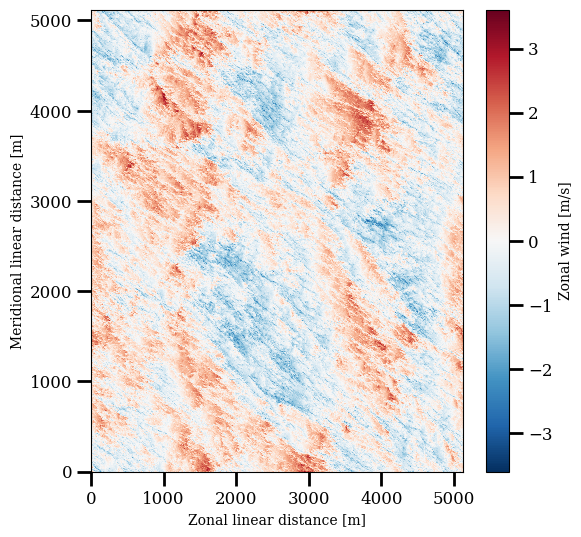

In [3]:
fig,ax = plt.subplots(figsize=(6,6))
u.plot()

# Format Dataset

In [4]:


# Create the xarray dataset
ds = xr.Dataset(    
    data_vars={
        'u': u,  # These are DataArrays - correct usage
        'v': v,
        'b': b
    }, 
    coords={
    'x': (['y', 'x'], X),
    'y': (['y', 'x'], Y)
})



# Calculate 2D Longitudinal SF

In [9]:
bins = {
    'x': np.logspace(np.log10(1.25), np.log10(5.0e3), 14),
    'y': np.logspace(np.log10(1.25), np.log10(5.0e3), 14)
}
sf_result = psf.bin_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='longitudinal',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1
)

Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

STARTING BIN_SF WITH FUNCTION TYPE: longitudinal
Variables: ['u', 'v'], Order: 2
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.1
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Bin dimensions: y=13, x=13
Total bins: 169
Bin type for x: logarithmic
Bin type for y: logarithmic
Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 12 bootstraps
  Processing spacing 2 with 12 bootstraps
  Processing spacing 4 with 12 bootstraps
  Processing spacing 8 with 12 bootstraps
  Processing spacing 16 with 12 bootstraps
  Processing spacing 32 with 12 bootstraps
  Processing spacing 64 with 12 bootstraps
  Processing spacing 128 with 12 bootstraps

CALCULATING BIN DENSITIES
Total points collected: 98304
Bins wi

# Plot 2D SFs

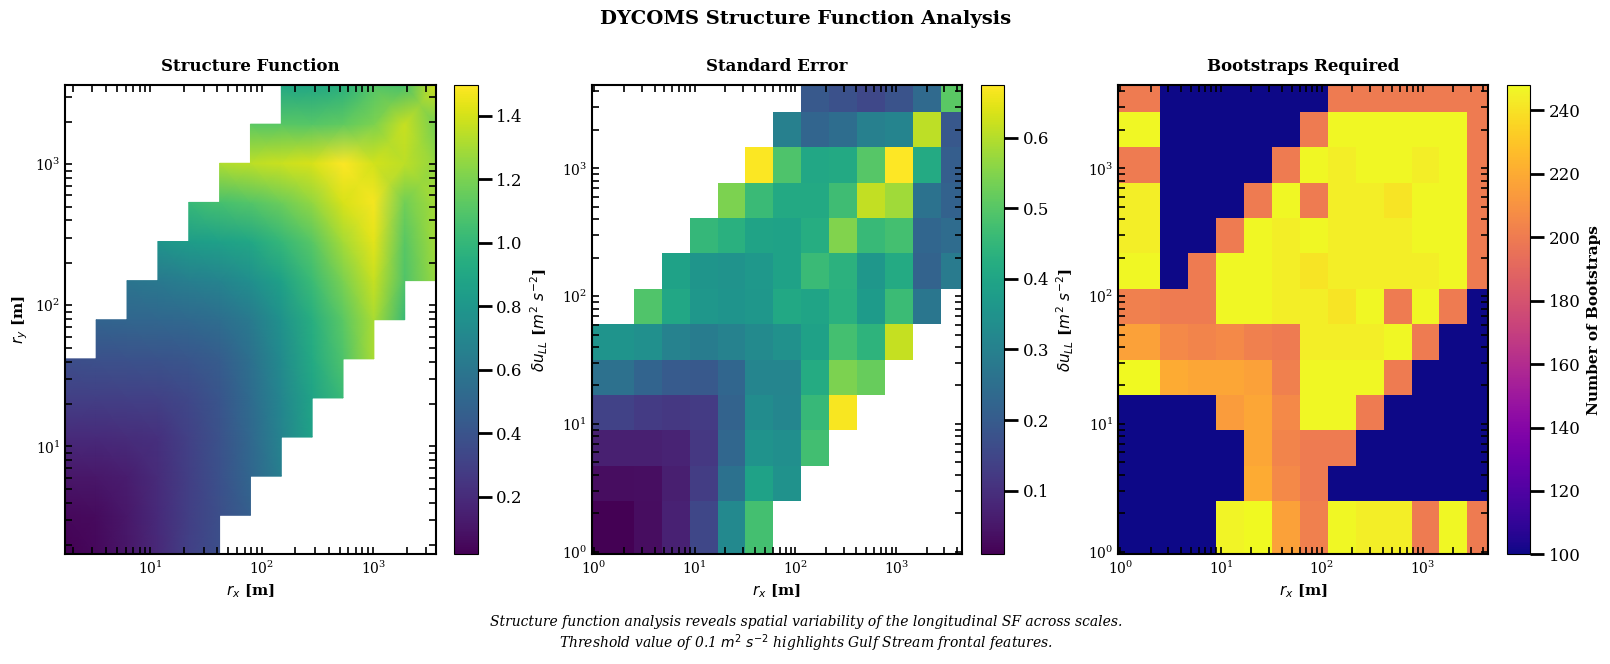

In [18]:
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5.5), constrained_layout=True)

# Common settings for all plots
plot_titles = ['Structure Function', 'Standard Error', 'Bootstraps Required']
cmaps = ['viridis', 'viridis', 'plasma']
labels = [r'$\delta u_{LL}$ [$m^{2}~s^{-2}$]', r'$\delta u_{LL}$ [$m^{2}~s^{-2}$]', 'Number of Bootstraps']

# Data to plot
data_to_plot = [sf_result.sf.T, sf_result.sf_std.T, sf_result.nbootstraps.T]

for i, (ax, data, title, cmap, label) in enumerate(zip(axes, data_to_plot, plot_titles, cmaps, labels)):
    # Create the plot with specific shading for the first plot
    if i == 0:
        im = ax.pcolormesh(sf_result.x, sf_result.y, data, cmap=cmap, shading='gouraud')
    else:
        im = ax.pcolormesh(sf_result.x, sf_result.y, data, cmap=cmap, shading='auto')
    
    # Add colorbar with proper formatting
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(label, fontsize=11, fontweight='bold')
    
    # Set axis labels and title
    ax.set_xlabel(r'$r_x$ [m]', fontsize=11, fontweight='bold')
    if i == 0:
        ax.set_ylabel(r'$r_y$ [m]', fontsize=11, fontweight='bold')
    
    # Set log scales
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add title
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    
    # Customize spines
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Customize tick parameters
    ax.tick_params(which='both', direction='in', width=1.2, length=5, 
                  labelsize=10, top=True, right=True)
    

    
    # Add scientific notation for axes
    ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())
    ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Add main title for the entire figure
fig.suptitle('DYCOMS Structure Function Analysis', fontsize=14, fontweight='bold', y=1.08)

# Add annotation explaining the analysis
fig.text(0.5, -0.08, 
         'Structure function analysis reveals spatial variability of the longitudinal SF across scales.\n'
         'Threshold value of 0.1 $m^{2}~s^{-2}$ highlights Gulf Stream frontal features.',
         ha='center', fontsize=10, fontstyle='italic')

plt.show()

# Calculate ISOTROPIC Longitudinal and Transverse SF 

In [14]:
bin_r = np.logspace(np.log10(np.sqrt(1.25**2 + 1.25**2)), np.log10(7.0e3), 21)
bins = {
    'r': bin_r,
}
iso_sf_lon = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='longitudinal',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1,
    window_size_r=8,
    window_size_theta=10,
)

iso_sf_trans = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","v"],
    order=2,
    bins=bins,
    fun='transverse',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.1,
    window_size_r=8,
    window_size_theta=10,
)

Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

STARTING ISOTROPIC_SF WITH FUNCTION TYPE: longitudinal
Variables: ['u', 'v'], Order: 2
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.1
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Detected logarithmic binning for radial dimension
Using 20 radial bins and 36 angular bins
Using window size 10 for theta and 8 for r
Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 12 bootstraps
  Processing spacing 2 with 12 bootstraps
  Processing spacing 4 with 12 bootstraps
  Processing spacing 8 with 12 bootstraps
  Processing spacing 16 with 12 bootstraps
  Processing spacing 32 with 12 bootstraps
  Processing spacing 64 with 12 bootstraps
  Processing spacing 128 with 12 bootstraps

CALCULATING BIN DENSIT

# Plot Isotropic Longitudinal and Transverse SF

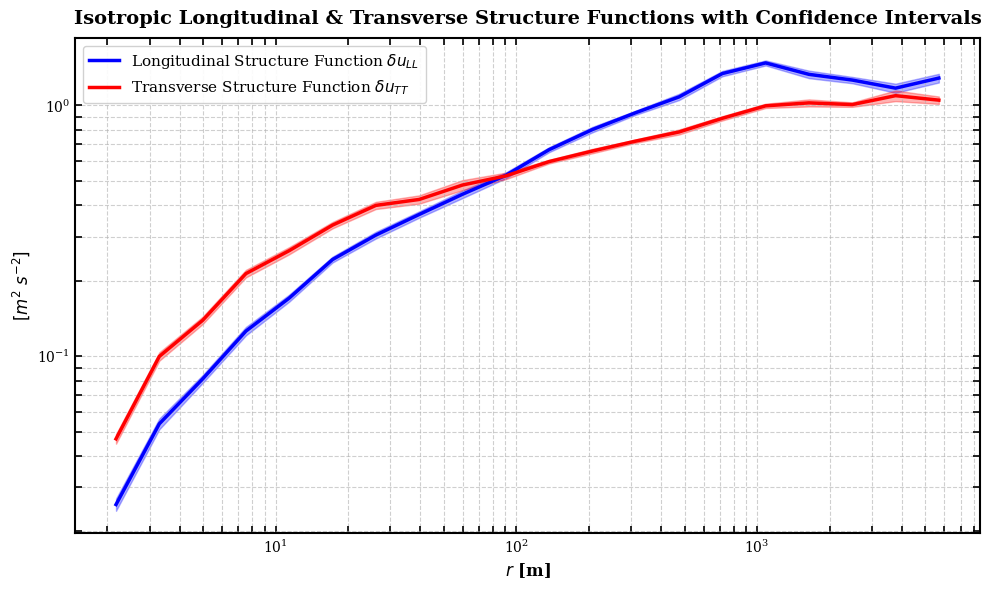

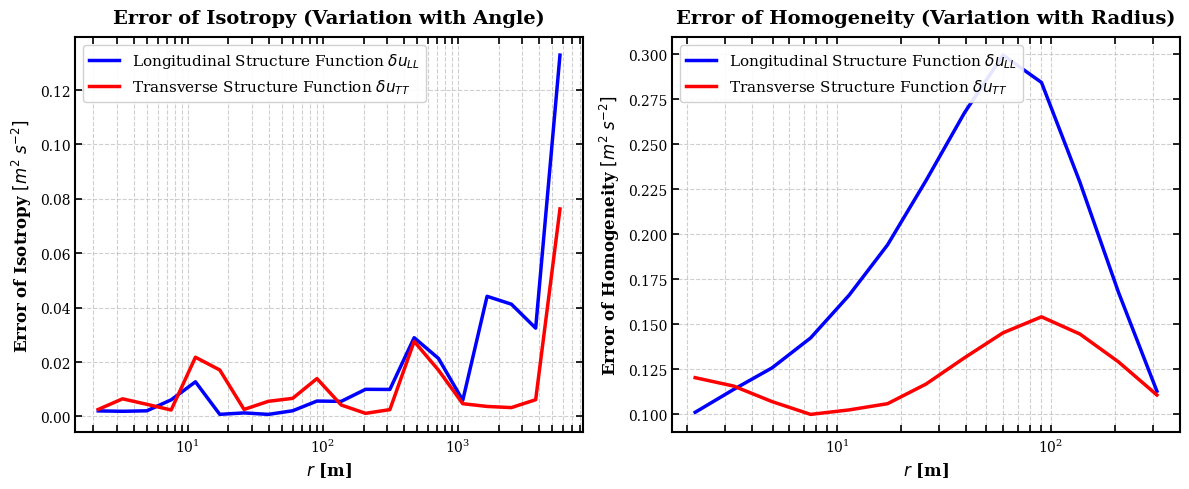

In [15]:
# Create separate figures for better spacing and clarity
plt.figure(figsize=(10, 6))
# Structure Function with Confidence Interval
plt.plot(iso_sf_lon.r, iso_sf_lon.sf, 'b-', linewidth=2.5, label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r, iso_sf_trans.sf, 'r-', linewidth=2.5, label='Transverse Structure Function'+' '+'$\delta u_{TT}$')

plt.fill_between(iso_sf_lon.r, 
                iso_sf_lon.ci_lower, 
                iso_sf_lon.ci_upper, 
                alpha=0.3, color='blue')

plt.fill_between(iso_sf_trans.r, 
                iso_sf_trans.ci_lower, 
                iso_sf_trans.ci_upper, 
                alpha=0.3, color='red')

# Formatting
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel(r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Isotropic Longitudinal & Transverse Structure Functions with Confidence Intervals', 
         fontsize=14, fontweight='bold', pad=10)
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.yscale('log')
plt.xscale('log')

# Customize spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Customize tick parameters
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

# --------------------------------------------------
# Errors of Isotropy and Homogeneity
# --------------------------------------------------
plt.figure(figsize=(12, 5))

# Error of isotropy
plt.subplot(121)
plt.plot(iso_sf_lon.r, iso_sf_lon.error_isotropy, 'b-', linewidth=2.5,label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r, iso_sf_trans.error_isotropy, 'r-', linewidth=2.5,label='Transverse Structure Function'+' '+'$\delta u_{TT}$')

plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Isotropy'+' '+r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Error of Isotropy (Variation with Angle)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Error of homogeneity
plt.subplot(122)
plt.plot(iso_sf_lon.r_subset, iso_sf_lon.error_homogeneity, 'b-', linewidth=2.5,label='Longitudinal Structure Function'+' '+'$\delta u_{LL}$')
plt.plot(iso_sf_trans.r_subset, iso_sf_trans.error_homogeneity, 'r-', linewidth=2.5,label='Transverse Structure Function'+' '+'$\delta u_{TT}$')
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Homogeneity'+' '+r'$[m^{2}~s^{-2}]$', fontsize=12, fontweight='bold')
plt.title('Error of Homogeneity (Variation with Radius)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')
plt.legend(fontsize=11, frameon=True, facecolor='white', framealpha=0.9)

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

plt.show()

# Calculate Isotropic $\delta u \delta b$

In [16]:
bin_r = np.logspace(np.log10(np.sqrt(1.25**2 + 1.25**2)), np.log10(7.0e3), 21)
bins = {
    'r': bin_r,
}
iso_sf_scalar = psf.get_isotropic_sf_2d(
    ds=ds,
    variables_names=["u","b"],
    order=(1,1),
    bins=bins,
    fun='scalar_scalar',
    bootsize={'y':32,'x':32},
    initial_nbootstrap=100,
    max_nbootstrap=200,
    step_nbootstrap=50,
    convergence_eps=0.01,
    window_size_r=8,
    window_size_theta=10,
)



Dimensions ('y', 'x') are already in the expected order
Using bootsize: {'y': 32, 'x': 32}
Bootstrappable dimensions: ['y', 'x']
Two bootstrappable dimensions. Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

STARTING ISOTROPIC_SF WITH FUNCTION TYPE: scalar_scalar
Variables: ['u', 'b'], Order: (1, 1)
Bootstrap parameters: initial=100, max=200, step=50
Convergence threshold: 0.01
Bootstrappable dimensions: ['y', 'x'] (count: 2)

Detected logarithmic binning for radial dimension
Using 20 radial bins and 36 angular bins
Using window size 10 for theta and 8 for r
Available spacings: [1, 2, 4, 8, 16, 32, 64, 128]

INITIAL BOOTSTRAP PHASE
  Processing spacing 1 with 12 bootstraps
  Processing spacing 2 with 12 bootstraps
  Processing spacing 4 with 12 bootstraps
  Processing spacing 8 with 12 bootstraps
  Processing spacing 16 with 12 bootstraps
  Processing spacing 32 with 12 bootstraps
  Processing spacing 64 with 12 bootstraps
  Processing spacing 128 with 12 bootstraps

CALCULATING BIN

# Plot Isotropic $\delta u \delta b$

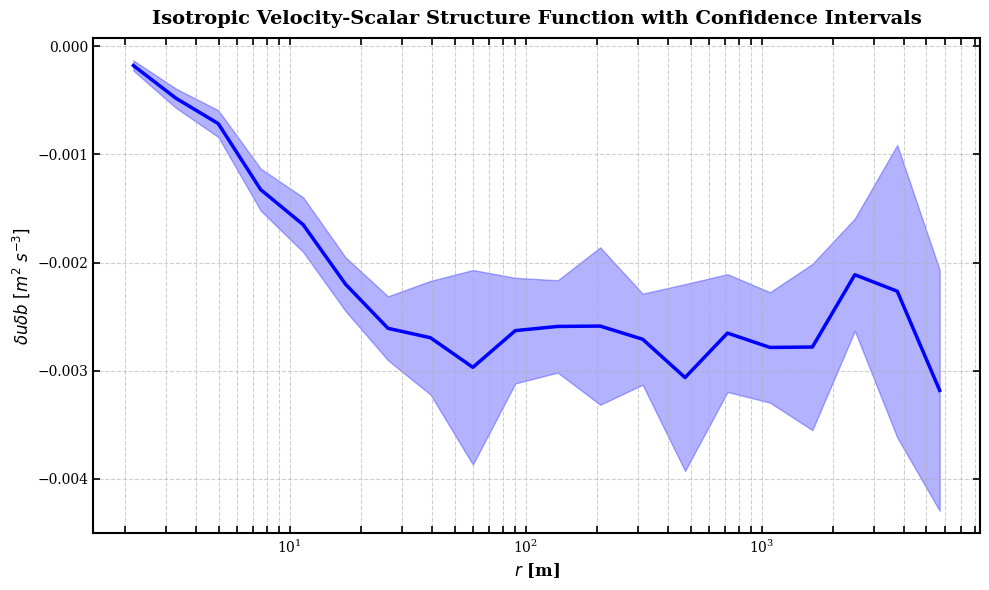

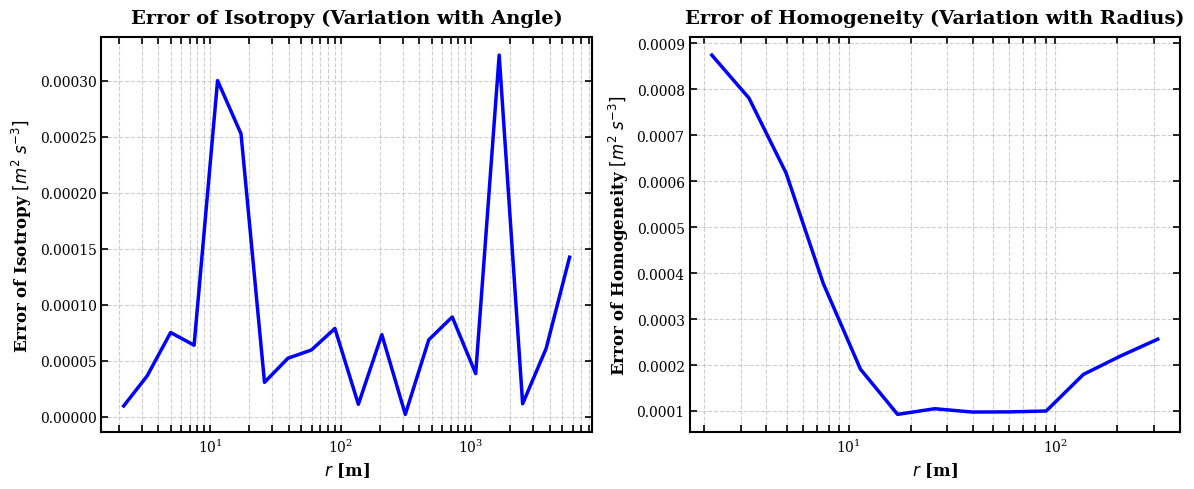

In [17]:
# Create separate figures for better spacing and clarity
plt.figure(figsize=(10, 6))
# Structure Function with Confidence Interval
plt.plot(iso_sf_scalar.r, iso_sf_scalar.sf, 'b-', linewidth=2.5)

plt.fill_between(iso_sf_scalar.r, 
                iso_sf_scalar.ci_lower, 
                iso_sf_scalar.ci_upper, 
                alpha=0.3, color='blue')



# Formatting
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel(r'$\delta u \delta b~[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Isotropic Velocity-Scalar Structure Function with Confidence Intervals', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Customize tick parameters
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

# --------------------------------------------------
# Errors of Isotropy and Homogeneity
# --------------------------------------------------
plt.figure(figsize=(12, 5))

# Error of isotropy
plt.subplot(121)
plt.plot(iso_sf_scalar.r, iso_sf_scalar.error_isotropy, 'b-', linewidth=2.5)

plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Isotropy'+' '+r'$[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Error of Isotropy (Variation with Angle)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

# Error of homogeneity
plt.subplot(122)
plt.plot(iso_sf_scalar.r_subset, iso_sf_scalar.error_homogeneity, 'b-', linewidth=2.5)
plt.xlabel(r'$r$ [m]', fontsize=12, fontweight='bold')
plt.ylabel('Error of Homogeneity'+' '+r'$[m^{2}~s^{-3}]$', fontsize=12, fontweight='bold')
plt.title('Error of Homogeneity (Variation with Radius)', 
         fontsize=14, fontweight='bold', pad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xscale('log')

# Customize spines and ticks
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(which='both', direction='in', width=1.2, length=5, 
              labelsize=10, top=True, right=True)
ax.xaxis.set_major_formatter(ticker.LogFormatterSciNotation())

plt.tight_layout()

plt.show()